IMAGE to TEXT using paddleOCR

In [ ]:
!pip install paddlepaddle

In [ ]:
!pip install "paddleocr>=2.0.1"

In [ ]:
!git clone https://github.com/PaddlePaddle/PaddleOCR

In [4]:
from paddleocr import PaddleOCR,draw_ocr
import matplotlib.pyplot as plt
import cv2
import os

In [5]:
# model setup - selecting english as the language
ocr = PaddleOCR(lang ='en')

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to C:\Users\sathv/.paddleocr/whl\det\en\en_PP-OCRv3_det_infer\en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:18<00:00, 222kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to C:\Users\sathv/.paddleocr/whl\rec\en\en_PP-OCRv4_rec_infer\en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:13<00:00, 786kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to C:\Users\sathv/.paddleocr/whl\cls\ch_ppocr_mobile_v2.0_cls_infer\ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:02<00:00, 995kiB/s] 

[2024/09/07 17:54:12] ppocr DEBUG: Namespace(alpha=1.0, alphacolor=(255, 255, 255), benchmark=False, beta=1.0, binarize=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\sathv/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\sathv/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None,

In [6]:
# getting the image file directory
img_path = os.path.join('../','drug1.jpg')

# making detection
result = ocr.ocr(img_path)

[2024/09/07 17:54:17] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/09/07 17:54:17] ppocr DEBUG: dt_boxes num : 6, elapsed : 0.22887730598449707
[2024/09/07 17:54:18] ppocr DEBUG: rec_res num  : 6, elapsed : 0.24956798553466797


In [7]:
result[0]

[[[[219.0, 199.0], [288.0, 202.0], [288.0, 216.0], [218.0, 214.0]],
  ('50MCG TABLETS', 0.950020432472229)],
 [[[217.0, 218.0], [337.0, 215.0], [338.0, 232.0], [218.0, 235.0]],
  ('TAKE ONE TABLET BY', 0.9259033203125)],
 [[[219.0, 232.0], [285.0, 234.0], [285.0, 249.0], [218.0, 246.0]],
  ('EVERY DAY', 0.9418787360191345)],
 [[[219.0, 257.0], [254.0, 260.0], [253.0, 274.0], [218.0, 272.0]],
  ('QTY90', 0.9742363691329956)],
 [[[218.0, 289.0], [293.0, 293.0], [292.0, 306.0], [217.0, 303.0]],
  (' Fied12-01-2019', 0.7921863794326782)]]

In [9]:
# box coords 
result[0][0]

[[[219.0, 199.0], [288.0, 202.0], [288.0, 216.0], [218.0, 214.0]],
 ('50MCG TABLETS', 0.950020432472229)]

In [8]:
for res in result[0]:
  print(res[1][0])

50MCG TABLETS
TAKE ONE TABLET BY
EVERY DAY
QTY90
 Fied12-01-2019


In [11]:
# extracting texts and other features
boxes = [res[0] for res in result[0]]
texts = [res[1][0] for res in result[0]]
scores = [res[1][1] for res in result[0]]

scores,texts,boxes

([0.950020432472229,
  0.9259033203125,
  0.9418787360191345,
  0.9742363691329956,
  0.7921863794326782],
 ['50MCG TABLETS',
  'TAKE ONE TABLET BY',
  'EVERY DAY',
  'QTY90',
  ' Fied12-01-2019'],
 [[[219.0, 199.0], [288.0, 202.0], [288.0, 216.0], [218.0, 214.0]],
  [[217.0, 218.0], [337.0, 215.0], [338.0, 232.0], [218.0, 235.0]],
  [[219.0, 232.0], [285.0, 234.0], [285.0, 249.0], [218.0, 246.0]],
  [[219.0, 257.0], [254.0, 260.0], [253.0, 274.0], [218.0, 272.0]],
  [[218.0, 289.0], [293.0, 293.0], [292.0, 306.0], [217.0, 303.0]]])

In [12]:
# Specifying font path 
font_path = os.path.join('PaddleOCR/doc/fonts/', 'latin.ttf')

In [13]:
# importing our images
img = cv2.imread(img_path)
# change the image from BGR to RGB format
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

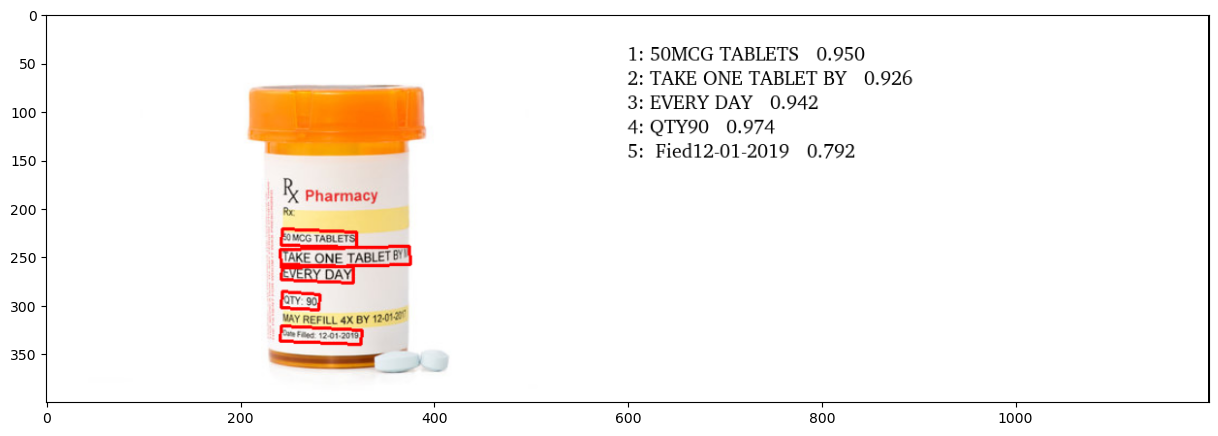

In [14]:
# Visualization
plt.figure(figsize= (15,15))
# draw annotation on images
annotation = draw_ocr(img, boxes,texts,scores,font_path = font_path )
plt.imshow(annotation)

In [17]:
# combining all the texts together
txt =' '.join(texts)
txt_file=open("result.txt","w")
txt_file.write(txt)

64

TEXT to SPEECH using Google TTS

In [ ]:
!pip install gTTS

In [19]:
from gtts import gTTS
import os

In [20]:
tts = gTTS(text=txt, lang='en', slow=False)

In [21]:
tts.save("output_audio.mp3")

In [22]:
os.system("start output_audio.mp3")

0